You are to cluster, and visualize, a small dataset using DBSCAN epsilon = 7.5, MinPts = 3). 

You have been provided a file, dbscan.csv, that has the following columns for each point in the dataset:


1. cluster originally empty, provided for your convenience pt a unique id for each data point


2. x point x-coordinate


3. y point y-coordinate


4. num neighbors number of neighbors, according to the coordinates above neighbors the id’s of all neighbors within
As you can see, a tedious O(n^2) portion of the work has been done for you. Your job is to execute, point-by-point, the DBSCAN algorithm, logging your work.


In [216]:
# load the data:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [217]:
df = pd.read_csv('dbscan.csv')



In [218]:
df

,cluster,pt,x,y,num_neighbors,neighbors
0,NaN,0,51.418089,13.593610,2,"0,27"
1,NaN,1,39.132318,-4.419204,3,"1,40,75"
2,NaN,2,47.807515,-25.822561,1,2
3,NaN,3,27.699703,53.434193,1,3
4,NaN,4,39.860995,5.676871,3,"4,56,75"
...,...,...,...,...,...,...
75,NaN,75,39.659047,0.230178,3,"1,4,75"
76,NaN,76,26.366491,8.798826,3,"21,49,76"
77,NaN,77,-36.184060,44.292045,2,"55,77"
78,NaN,78,44.012085,37.729478,3,"9,33,78"


In [219]:
# Execute, point by point, the DBSCAN algorithm

# 1. Compute distances, get neighbors:

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def get_neighbors(df, point, epsilon):
    neighbors = []
    for index, row in df.iterrows():
        if euclidean_distance(point[['x', 'y']], row[['x', 'y']]) <= epsilon:
            neighbors.append(row)
    return neighbors


In [220]:
# Implement DBSCAN using DFS and a queue:
def dbscan(data, epsilon, min_pts):
    cluster = 0 # cluster counter
    for i in range(len(data)):
        if pd.notna(data.loc[i, 'cluster']): # skip visited points
            continue
        neighbors = get_neighbors(data, data.iloc[i], epsilon) # find neighbors
        if len(neighbors) < min_pts: # Density check (mark as noise if not enough neighbors)
            data.loc[i, 'cluster'] = -1
        else:
            cluster += 1 # create a new cluster
            data.loc[i, 'cluster'] = cluster # assign this new cluster to the point
            j = 0
            while j < len(neighbors):
                p = neighbors[j].name
                if data.loc[p, 'cluster'] == -1:
                    data.loc[p, 'cluster'] = cluster
                elif pd.isna(data.loc[p, 'cluster']):
                    data.loc[p, 'cluster'] = cluster
                    new_neighbors = get_neighbors(data, data.iloc[p], epsilon)
                    if len(new_neighbors) >= min_pts:
                        neighbors.extend(new_neighbors)
                        # add new neighbors to the 'neighbors' column
                        data.loc[p, 'neighbors'] = ','.join(map(str, [n.name for n in new_neighbors]))
                j += 1

dbscan(df, 7.5, 3)

In [221]:
df['cluster'][0]

-1.0

In [222]:
print(df['cluster'].value_counts())


cluster
 2.0    43
-1.0    26
 1.0     8
 3.0     3
Name: count, dtype: int64


C:\Users\koola\AppData\Local\Temp\ipykernel_11220\3933244185.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', int(df['cluster'].max()) + 1)  # Use a colormap with enough colors


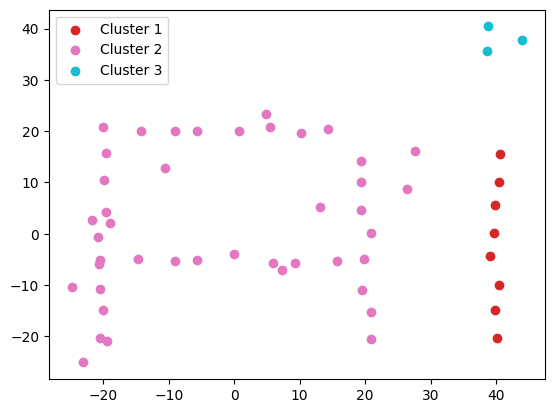

0.09683862383973955


In [223]:
# Plot the clusters:
fig, ax = plt.subplots()
colors = plt.cm.get_cmap('tab10', int(df['cluster'].max()) + 1)  # Use a colormap with enough colors
for i in range(1, int(df['cluster'].max()) + 1):
    cluster = df[df['cluster'] == i]
    ax.scatter(cluster['x'], cluster['y'], color=colors(i), label=f'Cluster {i}')
plt.legend()
plt.show()

# silhouette score
from sklearn.metrics import silhouette_score
print(silhouette_score(df[['x', 'y']], df['cluster']))


In [224]:
df

,cluster,pt,x,y,num_neighbors,neighbors
0,-1.0,0,51.418089,13.593610,2,"0,27"
1,1.0,1,39.132318,-4.419204,3,"1,40,75"
2,-1.0,2,47.807515,-25.822561,1,2
3,-1.0,3,27.699703,53.434193,1,3
4,1.0,4,39.860995,5.676871,3,"4,56,75"
...,...,...,...,...,...,...
75,1.0,75,39.659047,0.230178,3,"1,4,75"
76,2.0,76,26.366491,8.798826,3,"21,49,76"
77,-1.0,77,-36.184060,44.292045,2,"55,77"
78,3.0,78,44.012085,37.729478,3,"9,33,78"


C:\Users\koola\AppData\Local\Temp\ipykernel_11220\1027878539.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', int(df['cluster'].max()) + 1)  # Use a colormap with enough colors


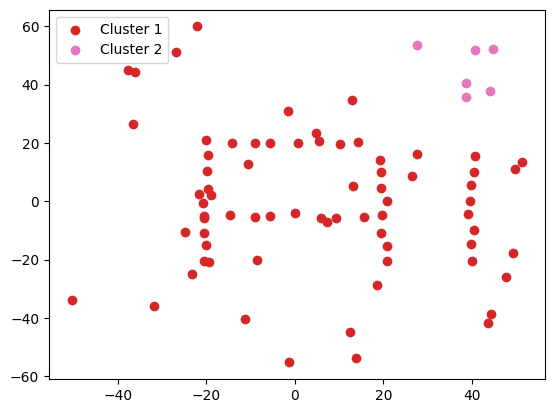

In [225]:
# show increasing epsilon:
df_other = pd.read_csv('dbscan.csv')
dbscan(df_other, 20, 3)

fig, ax = plt.subplots()
colors = plt.cm.get_cmap('tab10', int(df['cluster'].max()) + 1)  # Use a colormap with enough colors
for i in range(1, int(df_other['cluster'].max()) + 1):
    cluster = df_other[df_other['cluster'] == i]
    ax.scatter(cluster['x'], cluster['y'], color=colors(i), label=f'Cluster {i}')
plt.legend()
plt.show()

In [226]:
df_other

,cluster,pt,x,y,num_neighbors,neighbors
0,1.0,0,51.418089,13.593610,2,"0,27"
1,1.0,1,39.132318,-4.419204,3,"1,4,12,15,27,28,30,40,45,56,75,76"
2,1.0,2,47.807515,-25.822561,1,"2,12,13,15,28,40,51"
3,2.0,3,27.699703,53.434193,1,3
4,1.0,4,39.860995,5.676871,3,"0,1,4,21,27,30,40,56,66,75,76"
...,...,...,...,...,...,...
75,1.0,75,39.659047,0.230178,3,"0,1,4,21,27,28,30,40,56,66,75,76"
76,1.0,76,26.366491,8.798826,3,"1,4,16,21,30,31,38,45,48,49,52,56,64,66,75,76"
77,1.0,77,-36.184060,44.292045,2,"23,55,58,77"
78,2.0,78,44.012085,37.729478,3,"9,33,35,62,78"
